<a href="https://colab.research.google.com/github/andrew3181/hello-world/blob/master/Econometric_Model_for_Pie_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the data
import pandas as pd
data = pd.read_csv('pie_sales - data.csv')
data.head()

,Week,"Pie Sales ($1,000s)",Price ($),"Advertising ($1,000s)",Holiday
0,1,350,5.5,3.3,0
1,2,460,7.5,3.3,1
2,3,350,8.0,3.0,0
3,4,430,8.0,4.5,1
4,5,350,6.8,3.0,0


In [ ]:
# Clean the data
df = data.copy()

df.drop('Week', axis='columns', inplace=True)
df.index = df.index + 1 # to match week number

cols = {
    'Pie Sales ($1,000s)': 'sales',
    'Price ($)': 'price',
    'Advertising ($1,000s)': 'ads',
    'Holiday': 'holiday'
}
df.rename(columns=cols, inplace=True)

df.head()

,sales,price,ads,holiday
1,350,5.5,3.3,0
2,460,7.5,3.3,1
3,350,8.0,3.0,0
4,430,8.0,4.5,1
5,350,6.8,3.0,0


In [ ]:
# Run SKLearn Linear Regression Model
from sklearn import linear_model

predict_y = 'sales' # variable you're predicting
dependent_X = ['price', 'ads', 'holiday'] # variables you're using to predict 

y = df[predict_y] 
X = df[dependent_X] 

model = linear_model.LinearRegression()
model.fit(X, y)

r_sq = round(model.score(X, y), 2)
print('R-squared', r_sq)

R-squared 0.84


In [ ]:
# Print coefficients
for n in range(len(X.columns)):
    print(X.columns[n], round(model.coef_[n], 2))

print('intercept', round(model.intercept_, 2))

price -17.29
ads 16.34
holiday 89.43
intercept 415.1


In [ ]:
# Make predictions
df['forecast'] = model.predict(X)
df['forecast'] = df['forecast'].round().astype(int)
df.head()

,sales,price,ads,holiday,forecast
1,350,5.5,3.3,0,374
2,460,7.5,3.3,1,429
3,350,8.0,3.0,0,326
4,430,8.0,4.5,1,440
5,350,6.8,3.0,0,347


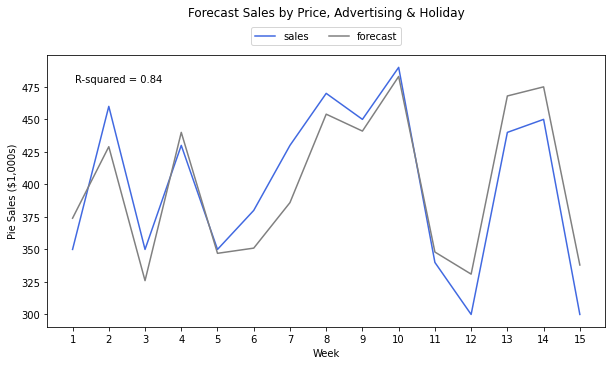

In [ ]:
# Plot Line Chart
import matplotlib.pyplot as plt

df.plot(y=['sales', 'forecast'], kind='line', color=['royalblue', 'grey'], figsize=(10,5))

plt.title('Forecast Sales by Price, Advertising & Holiday', y=1.12)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2)
plt.annotate(f'R-squared = {r_sq}', xy=(0.05, 0.90), xycoords='axes fraction')

plt.xlabel('Week')
plt.xticks(df.index) # force all x values to show
plt.ylabel('Pie Sales ($1,000s)')

plt.show();

R-squared: 0.84
Coefficients:
• price -17.29
• ads 16.34
• holiday 89.43
• intercept 415.1


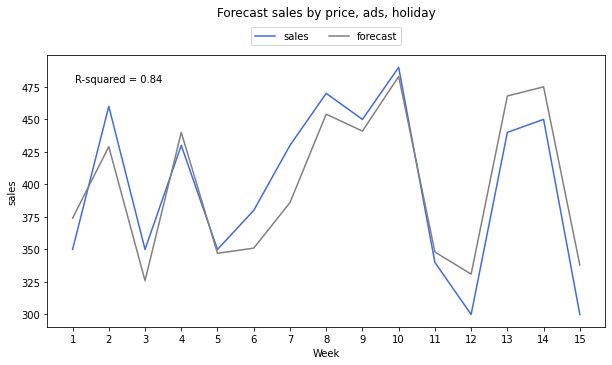

,sales,price,ads,holiday,forecast
1,350,5.5,3.3,0,374
2,460,7.5,3.3,1,429
3,350,8.0,3.0,0,326
4,430,8.0,4.5,1,440
5,350,6.8,3.0,0,347


In [ ]:
# Function to run econometric analysis in one go
def run_econometrics(df, predict_y, dependent_X):
    y = df[predict_y] 
    X = df[dependent_X] 

    model = linear_model.LinearRegression()
    
    model.fit(X, y)

    r_sq = round(model.score(X, y), 2)
    print('R-squared:', r_sq)

    print('Coefficients:')
    for n in range(len(X.columns)):
        print('• '+X.columns[n], round(model.coef_[n], 2))

    print('• intercept', round(model.intercept_, 2))

    df['forecast'] = model.predict(X)
    df['forecast'] = df['forecast'].round().astype(int)

    df.plot(y=[predict_y, 'forecast'], kind='line', color=['royalblue', 'grey'], figsize=(10,5))

    variable_names = ', '.join([var for var in X.columns])

    plt.title(f'Forecast {predict_y} by {variable_names}', y=1.12)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2)
    plt.annotate(f'R-squared = {r_sq}', xy=(0.05, 0.90), xycoords='axes fraction')

    plt.xlabel('Week')
    plt.xticks(df.index) # force all x values to show
    plt.ylabel(predict_y)

    plt.show();

    return df

run_econometrics(df, 'sales', ['price', 'ads', 'holiday']).head()

R-squared: 0.52
Coefficients:
• price -24.98
• ads 74.13
• intercept 306.53


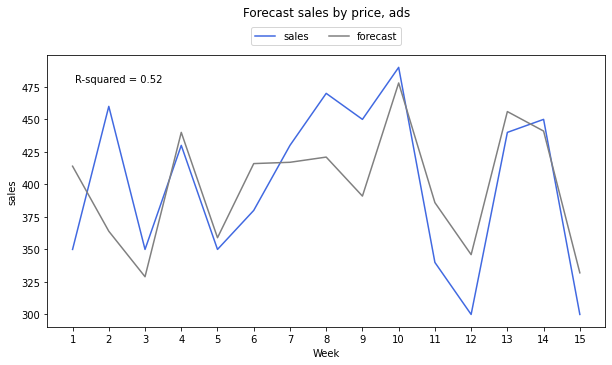

,sales,price,ads,holiday,forecast
1,350,5.5,3.3,0,414
2,460,7.5,3.3,1,364
3,350,8.0,3.0,0,329
4,430,8.0,4.5,1,440
5,350,6.8,3.0,0,359


In [ ]:
run_econometrics(df, 'sales', ['price', 'ads']).head()

In [ ]:
# Function for calculating adstocks https://pythonplotscience.blogspot.com/2017/08/a-simple-advertising-adstock.html
def adstocked_advertising(adstock_rate, advertising):
    adstocked_advertising = []
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising.iloc[i])
        else:
            adstocked_advertising.append(round(advertising.iloc[i] + adstock_rate * adstocked_advertising[i-1], 1))            
    return adstocked_advertising
            
df['adstocks'] = adstocked_advertising(adstock_rate=0.15, advertising=df['ads'])
df.head()

,sales,price,ads,holiday,forecast,adstocks
1,350,5.5,3.3,0,414,3.3
2,460,7.5,3.3,1,364,3.8
3,350,8.0,3.0,0,329,3.6
4,430,8.0,4.5,1,440,5.0
5,350,6.8,3.0,0,359,3.8


R-squared: 0.84
Coefficients:
• price -17.74
• adstocks 20.52
• holiday 86.64
• intercept 392.9


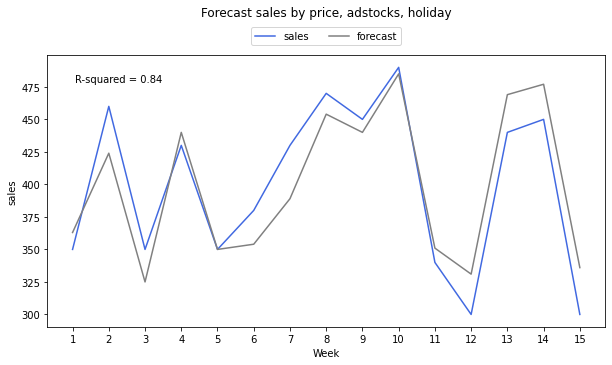

,sales,price,ads,holiday,forecast,adstocks
1,350,5.5,3.3,0,363,3.3
2,460,7.5,3.3,1,424,3.8
3,350,8.0,3.0,0,325,3.6
4,430,8.0,4.5,1,440,5.0
5,350,6.8,3.0,0,350,3.8


In [ ]:
run_econometrics(df, 'sales', ['price', 'adstocks', 'holiday']).head()